<a href="https://colab.research.google.com/github/mathuscm/PJ4_Analise_Combustivel/blob/main/Arquivo%20principal%20e%20datasets/projetoemgrupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório da Agência Nacional de Petróleo, Gás Natural e Biocombustíveis

A análise deve responder às seguintes perguntas:
1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do
etanol e da gasolina tiveram uma tendência de queda ou diminuição?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?
3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?
5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [1]:
# Importando as bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Abrir arquivos dos dados dos preços da gasolina e etanol mês de maio.
precos_gaso_et5 = pd.read_csv('precosgemes5.csv', sep=';')
display(precos_gaso_et5)


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,01/05/2023,"3,79",NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,01/05/2023,"4,69",NaN,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,ETANOL,01/05/2023,"5,49",NaN,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA ADITIVADA,01/05/2023,"6,97",NaN,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA,01/05/2023,"6,97",NaN,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58485,SE,SP,VALINHOS,AUTO POSTO MUNICIPALDE ANDRADAS LTDA,44.059.126/0001-07,RODOVIA MUNICIPAL DOS ANDRADAS,3294,NaN,JARDIM LORENA,13277-650,ETANOL,31/05/2023,"3,49",NaN,R$ / litro,IPIRANGA
58486,SE,SP,VALINHOS,AUTO POSTO MUNICIPALDE ANDRADAS LTDA,44.059.126/0001-07,RODOVIA MUNICIPAL DOS ANDRADAS,3294,NaN,JARDIM LORENA,13277-650,GASOLINA ADITIVADA,31/05/2023,"4,99",NaN,R$ / litro,IPIRANGA
58487,SE,SP,VALINHOS,AUTO POSTO MUNICIPALDE ANDRADAS LTDA,44.059.126/0001-07,RODOVIA MUNICIPAL DOS ANDRADAS,3294,NaN,JARDIM LORENA,13277-650,GASOLINA,31/05/2023,"4,69",NaN,R$ / litro,IPIRANGA
58488,SE,SP,PIRASSUNUNGA,AUTO POSTO PADRE ANTONI LTDA,45.224.849/0001-87,AVENIDA PADRE ANTONIO VANN ESS,1144,NaN,CENTRO,13630-025,ETANOL,31/05/2023,"3,49",NaN,R$ / litro,IPIRANGA


<font size=5> 1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?


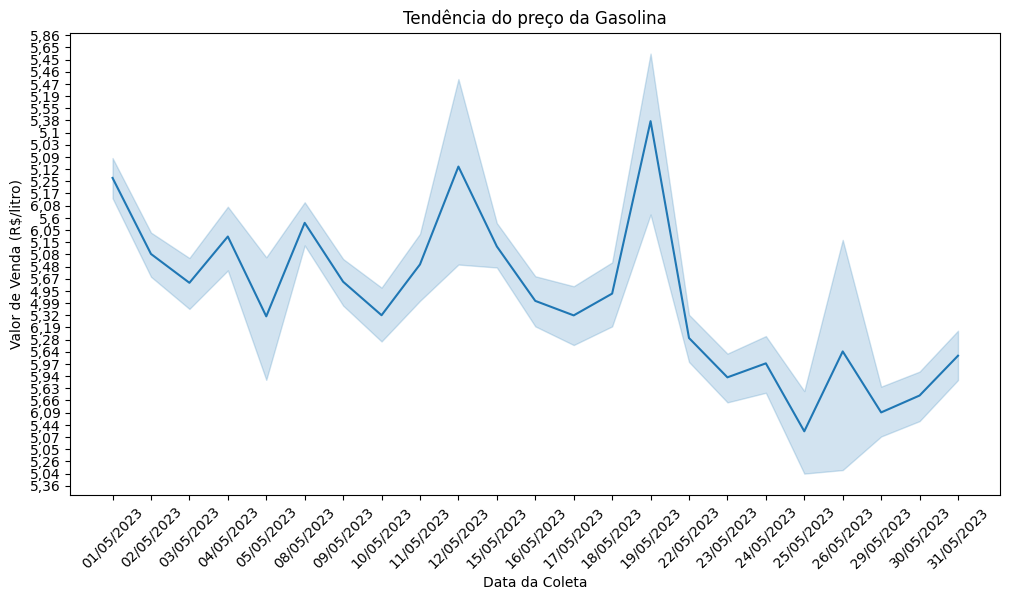

In [5]:
# Filtrar o produto específico
df_gasolina_5 = precos_gaso_et5[precos_gaso_et5['Produto'] == 'GASOLINA']

# Criar gráfico de linha para visualizar a tendência dos preços de gasolina
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gasolina_5, x='Data da Coleta', y='Valor de Venda')
plt.title('Tendência do preço da Gasolina')
plt.xlabel('Data da Coleta')
plt.ylabel('Valor de Venda (R$/litro)')
plt.xticks(rotation=45)
plt.show()

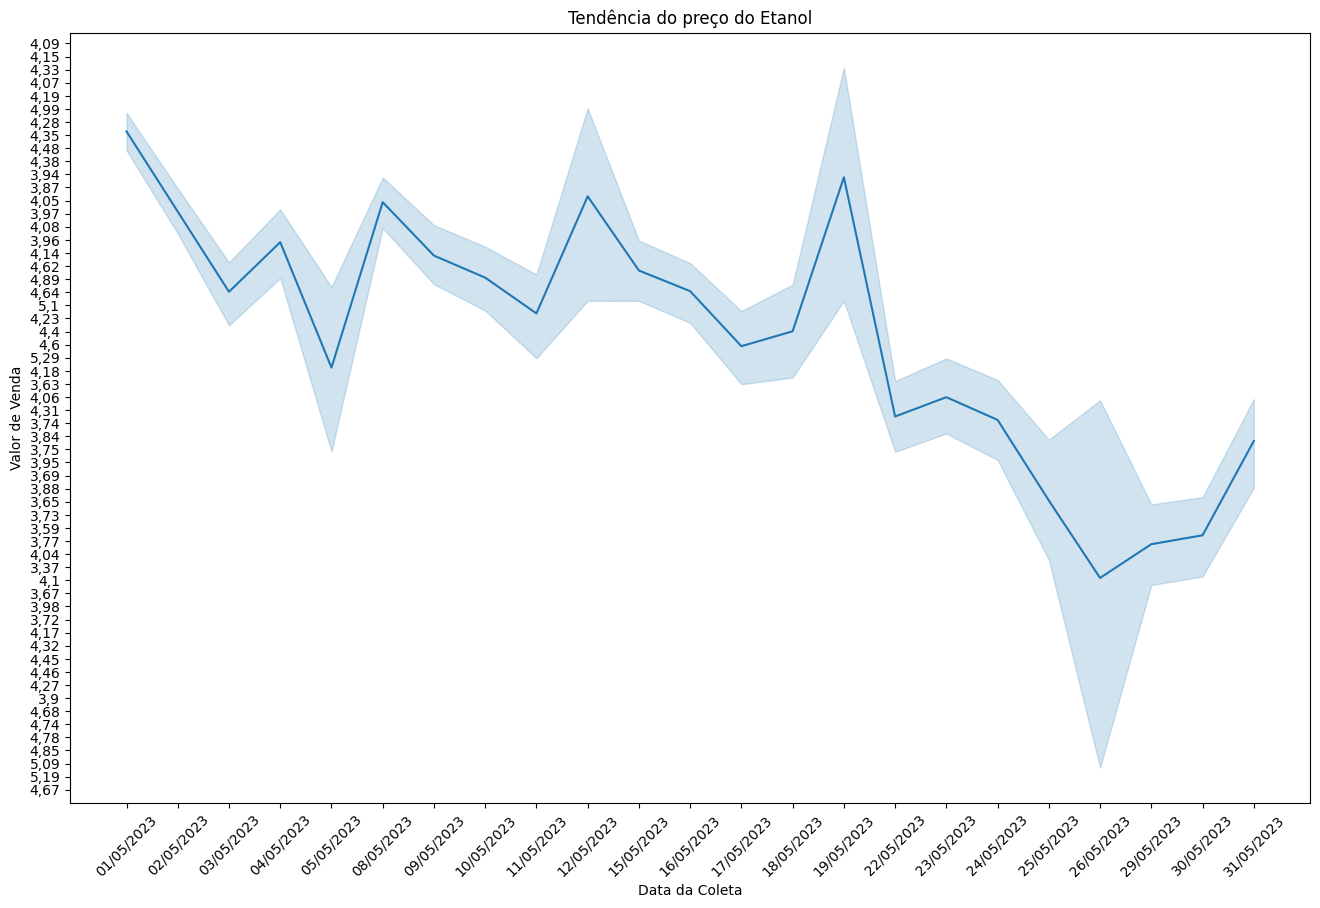

In [6]:
# Filtrar produto
df_etanol_5 = precos_gaso_et5[precos_gaso_et5['Produto'] == 'ETANOL']

# Criar gráfico
plt.figure(figsize=(16, 10))
sns.lineplot(data=df_etanol_5, x='Data da Coleta', y='Valor de Venda')
plt.title('Tendência do preço do Etanol')
plt.xticks(rotation=45)
plt.show()


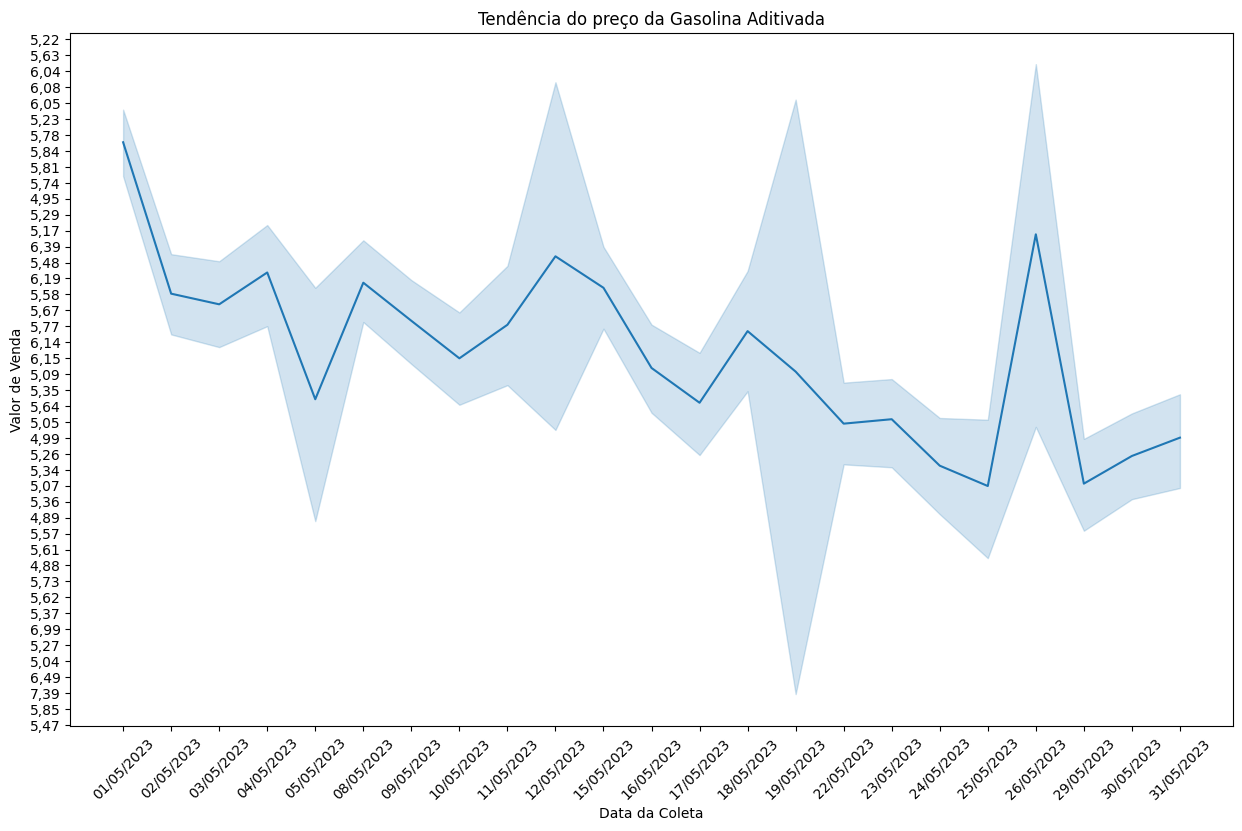

In [7]:
# Filtrar produto
df_gasolina_adv_5 = precos_gaso_et5[precos_gaso_et5['Produto'] == 'GASOLINA ADITIVADA']
# Criar gráfico
plt.figure(figsize=(15, 9))
sns.lineplot(data=df_gasolina_adv_5, x='Data da Coleta', y='Valor de Venda')
plt.title('Tendência do preço da Gasolina Aditivada')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Filtrar dados da gasolina e etanol do mês de junho
precos_gaso_et6 = pd.read_csv('precosgemes6.csv', sep=';')
display(precos_gaso_et6)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,ETANOL,01/06/2023,"4,31",NaN,R$ / litro,VIBRA ENERGIA
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,GASOLINA,01/06/2023,"5,39",NaN,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,ETANOL,01/06/2023,"4,19",NaN,R$ / litro,VIBRA ENERGIA
3,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,GASOLINA ADITIVADA,01/06/2023,"5,36",NaN,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,GASOLINA,01/06/2023,"5,29",NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49036,NE,BA,CAMACARI,POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA,28.315.993/0001-00,RUA C,27,LOTEAMENTO JARDIM FL AMBOYANTS,VILA DE ABRANTES,42840-000,GASOLINA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA
49037,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,ETANOL,30/06/2023,"4,44",NaN,R$ / litro,BRANCA
49038,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,GASOLINA ADITIVADA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA
49039,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,GASOLINA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA


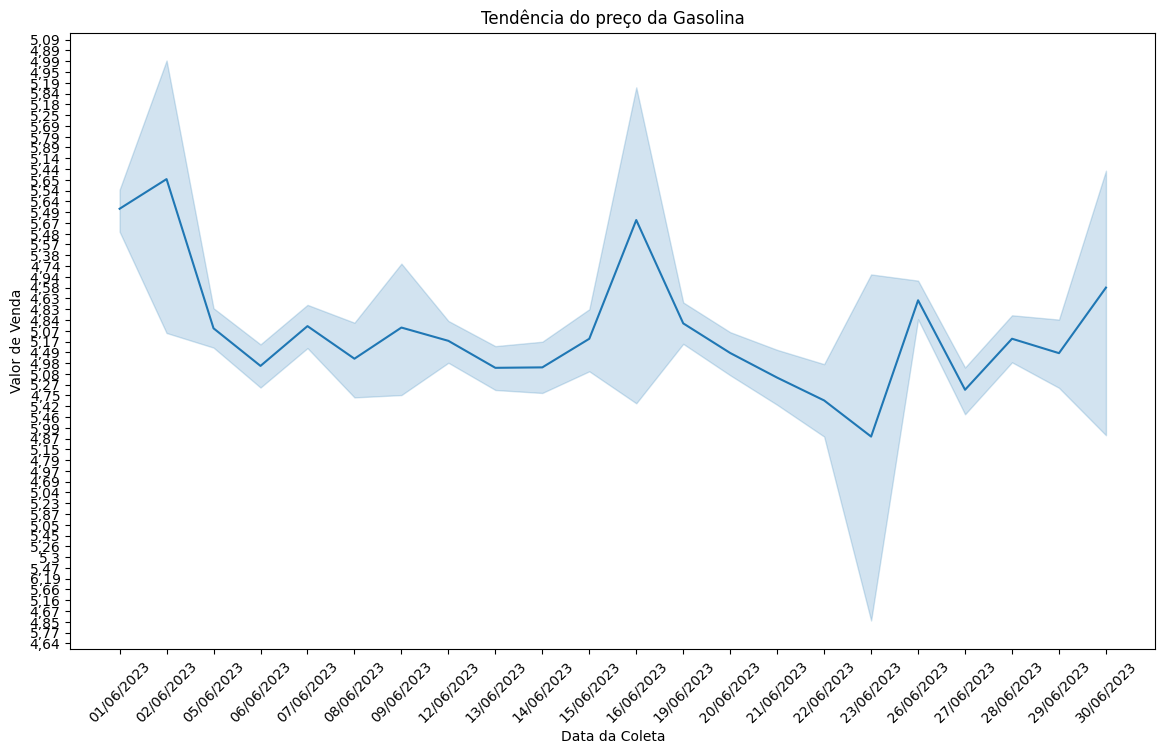

In [9]:
df_gasolina_6 = precos_gaso_et6[precos_gaso_et6['Produto'] == 'GASOLINA']

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_gasolina_6, x='Data da Coleta', y='Valor de Venda')
plt.title('Tendência do preço da Gasolina')
plt.xticks(rotation=45)
plt.show()

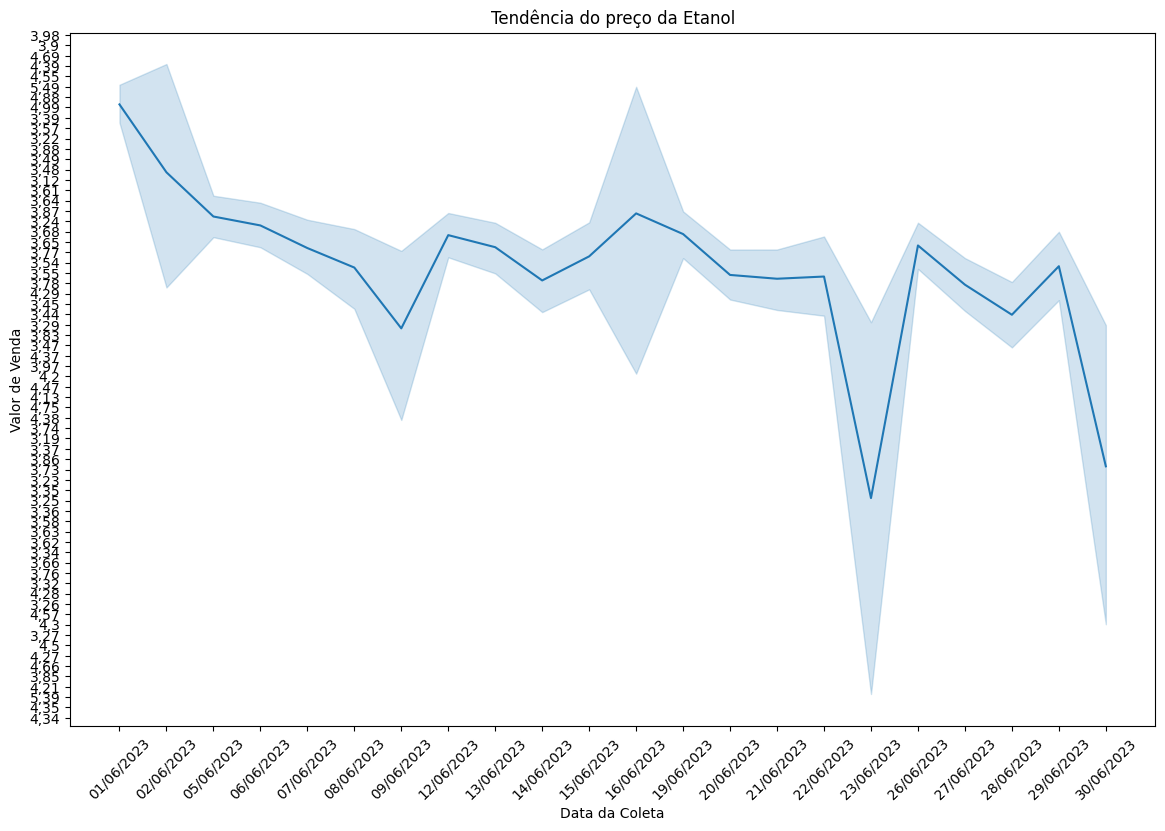

In [10]:
df_etanol_6 = precos_gaso_et6[precos_gaso_et6['Produto'] == 'ETANOL']

plt.figure(figsize=(14, 9))
sns.lineplot(data=df_etanol_6, x='Data da Coleta', y='Valor de Venda')
plt.title('Tendência do preço da Etanol')
plt.xticks(rotation=45)
plt.show()

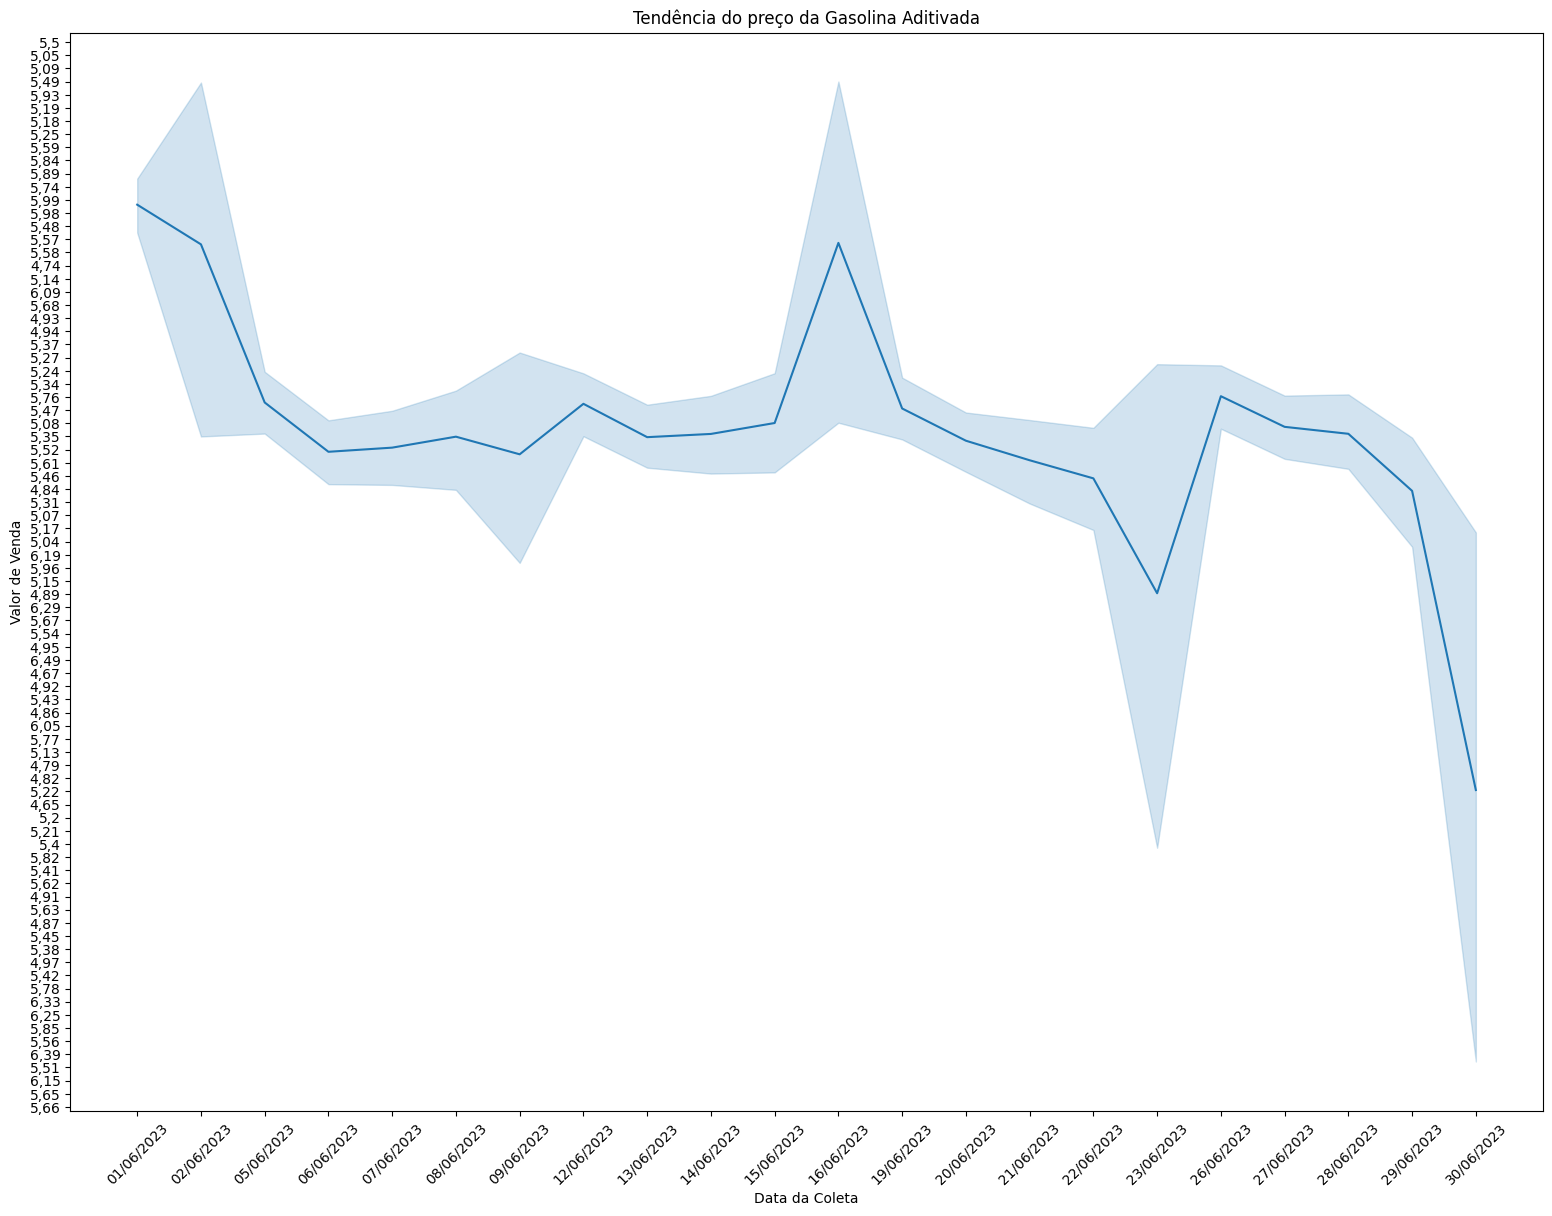

In [11]:
df_gasolina_adv_6 = precos_gaso_et6[precos_gaso_et6['Produto'] == 'GASOLINA ADITIVADA']

plt.figure(figsize=(19, 14))
sns.lineplot(data=df_gasolina_adv_6, x='Data da Coleta', y='Valor de Venda')
plt.title('Tendência do preço da Gasolina Aditivada')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Concatenar as tabelas e juntas os indices
# pode ser esse tambem mas ele nao junta os indices keys=['mes5', 'mes6']
tabelas_preco_gasol_etan = pd.concat([precos_gaso_et5, precos_gaso_et6], ignore_index=True)
tabelas_preco_gasol_etan

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,01/05/2023,"3,79",NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,01/05/2023,"4,69",NaN,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,ETANOL,01/05/2023,"5,49",NaN,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA ADITIVADA,01/05/2023,"6,97",NaN,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA,01/05/2023,"6,97",NaN,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107526,NE,BA,CAMACARI,POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA,28.315.993/0001-00,RUA C,27,LOTEAMENTO JARDIM FL AMBOYANTS,VILA DE ABRANTES,42840-000,GASOLINA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA
107527,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,ETANOL,30/06/2023,"4,44",NaN,R$ / litro,BRANCA
107528,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,GASOLINA ADITIVADA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA
107529,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,GASOLINA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA


In [17]:
# Mostra todas as colunas.
tabelas_preco_gasol_etan.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

In [18]:
# Deletando colunas usando o drop para fazer a limpeza adequada da tabela.
tabelas_preco_gasol_etan2 = tabelas_preco_gasol_etan.drop(columns=['Revenda','CNPJ da Revenda','Valor de Compra','Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Unidade de Medida'])


In [19]:
# Renomear nomes das colunas
tabelas_preco_gasol_etan3 = tabelas_preco_gasol_etan2.rename(columns=lambda x: x.replace('Regiao - Sigla', 'Sigla_Regiao').replace('Estado - Sigla','Sigla_Estado').replace('Data da Coleta','Data_da_Coleta').replace('Valor de Venda','Valor_de_Venda',))
tabelas_preco_gasol_etan3

,Sigla_Regiao,Sigla_Estado,Municipio,Produto,Data_da_Coleta,Valor_de_Venda,Bandeira
0,SE,SP,SOROCABA,ETANOL,01/05/2023,"3,79",BRANCA
1,SE,SP,SOROCABA,GASOLINA,01/05/2023,"4,69",BRANCA
2,N,AC,CRUZEIRO DO SUL,ETANOL,01/05/2023,"5,49",IPIRANGA
3,N,AC,CRUZEIRO DO SUL,GASOLINA ADITIVADA,01/05/2023,"6,97",IPIRANGA
4,N,AC,CRUZEIRO DO SUL,GASOLINA,01/05/2023,"6,97",IPIRANGA
...,...,...,...,...,...,...,...
107526,NE,BA,CAMACARI,GASOLINA,30/06/2023,"5,64",BRANCA
107527,NE,BA,CAMACARI,ETANOL,30/06/2023,"4,44",BRANCA
107528,NE,BA,CAMACARI,GASOLINA ADITIVADA,30/06/2023,"5,64",BRANCA
107529,NE,BA,CAMACARI,GASOLINA,30/06/2023,"5,64",BRANCA


In [20]:
# Substituir vírgulas por pontos e converter para float
tabelas_preco_gasol_etan3['Valor_de_Venda'] = tabelas_preco_gasol_etan3['Valor_de_Venda'].str.replace(',', '.').astype(float)

In [21]:
# simplificando o nome do dataframe
df = tabelas_preco_gasol_etan3

2. Qual o preço médio da gasolina e do etanol nesses dois meses?

In [34]:
# Média total por produto citado na tabela
media_por_produto = df.groupby('Produto')['Valor_de_Venda'].mean()
media_por_produto

Produto
ETANOL                4.100088
GASOLINA              5.397903
GASOLINA ADITIVADA    5.579708
Name: Valor_de_Venda, dtype: float64

3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

In [25]:
# Realizando filtragem dos produtos citados para verificar os preços médios mais caros
df_gaso_etanol = df[df['Produto'].isin(['GASOLINA', 'ETANOL'])]
media_combustivel = df_gaso_etanol.groupby(['Sigla_Estado', 'Produto'])['Valor_de_Venda'].mean()
df_precos = media_combustivel.reset_index()
media_gasolina = df_precos[df_precos['Produto'] == 'GASOLINA']
media_etanol = df_precos[df_precos['Produto'] == 'ETANOL']
top_etanol = media_etanol.sort_values(by='Valor_de_Venda', ascending = False).head(5)
top_gasolina = media_gasolina.sort_values(by='Valor_de_Venda', ascending = False).head(5)
print(top_etanol)
print(top_gasolina)

   Sigla_Estado Produto  Valor_de_Venda
6            AP  ETANOL        5.240000
42           RR  ETANOL        5.050000
40           RO  ETANOL        4.948502
44           RS  ETANOL        4.871154
0            AC  ETANOL        4.783437
   Sigla_Estado   Produto  Valor_de_Venda
5            AM  GASOLINA        6.361536
1            AC  GASOLINA        6.121221
41           RO  GASOLINA        5.899349
43           RR  GASOLINA        5.858431
3            AL  GASOLINA        5.674847


<font size=5> 7. Qual a região que possui o maior valor médio da gasolina?

* Gasolina C

O valor médio da gasolina, é maior na região Norte. Tendo valor de R$ 5,779(aproximado).

Enquanto a região Sudeste tem a gasolina mais barata. Com média de R$5,308(aproximado).

In [26]:
# Mostrar a região com o maior valor médio para a 'Gasolina'.
gasolina = 'GASOLINA'

# Extraindo somente os resultados para gasolina.
extrai_gasolina = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == gasolina]

# Calcular a média do preço para o produto específico por região.
media_por_regiao = extrai_gasolina.groupby('Sigla_Regiao')['Valor_de_Venda'].mean().round(3)
print(media_por_regiao)

Sigla_Regiao
CO    5.382
N     5.779
NE    5.454
S     5.428
SE    5.308
Name: Valor_de_Venda, dtype: float64


* Gasolina Aditivada

Obtemos o resultado da gasolina aditivada, também com maior valor médio na região Norte. Tendo seu valor de R$ 5,946(aproximado).

Já a região Centro Oeste conta com a gasolina mais barata. Com média de R$ 5,524(aproximado).

In [27]:
# Mostrando a região com o maior valor médio para a 'Gasolina Aditivada'.
gasolinaAd = 'GASOLINA ADITIVADA'

# Filtrando por gasolina aditivada.
extrai_gasolinaAd = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == gasolinaAd]

# Calcular a média do preço para o produto específico por região.
media_por_regiaoAd = extrai_gasolinaAd.groupby('Sigla_Regiao')['Valor_de_Venda'].mean().round(3)
print(media_por_regiaoAd)

Sigla_Regiao
CO    5.524
N     5.946
NE    5.594
S     5.578
SE    5.533
Name: Valor_de_Venda, dtype: float64


<font size=5> 8. Qual a região que possui o menor valor médio do etanol?

* Etanol

A região Centro Oeste representa o menor valor médio do Etanol. Com valor de R$ 3,861(aproximado).

Em contra partida o combustível esteve mais caro na região Norte. Com média de R$ 4,718(aproximado).

In [28]:
# Mostrar a região com o menor valor médio do 'Etanol'.
etanol = 'ETANOL'

# Extraindo somente os resultados para etanol.
extrai_etanol = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == etanol]

# Calcular a média do preço para o produto específico por região.
media_por_regiao = extrai_etanol.groupby('Sigla_Regiao')['Valor_de_Venda'].mean().round(3)
print(media_por_regiao)

Sigla_Regiao
CO    3.861
N     4.718
NE    4.413
S     4.419
SE    3.904
Name: Valor_de_Venda, dtype: float64


In [29]:
# Ver a quantidade de valores nulos em cada coluna.
valores_nulos = tabelas_preco_gasol_etan3.isna().sum()
valores_nulos

Sigla_Regiao      0
Sigla_Estado      0
Municipio         0
Produto           0
Data_da_Coleta    0
Valor_de_Venda    0
Bandeira          0
dtype: int64

In [30]:
# preco Minimo
preco_minimo = tabelas_preco_gasol_etan3.groupby('Produto')['Valor_de_Venda'].min()
# Resetar o índice e renomear a coluna
preco_minimo = preco_minimo.reset_index()
preco_minimo.rename(columns={'Valor_de_Venda': 'Preco_Mínimo'}, inplace=True)
preco_minimo

,Produto,Preco_Mínimo
0,ETANOL,2.97
1,GASOLINA,4.09
2,GASOLINA ADITIVADA,4.49


In [31]:
# preco Maximo
preco_maximo = tabelas_preco_gasol_etan3.groupby('Produto')['Valor_de_Venda'].max()
# Resetar o índice e renomear a coluna
preco_maximo = preco_maximo.reset_index()
preco_maximo.rename(columns={'Valor_de_Venda': 'Preco_Máximo'}, inplace=True)
preco_maximo

,Produto,Preco_Máximo
0,ETANOL,6.73
1,GASOLINA,7.35
2,GASOLINA ADITIVADA,7.99


In [32]:
# Somar valor total das vendas dos 03 produtos: Etanol, Gasolina e Gasolina Aditivada.
soma_valordevendatotal = tabelas_preco_gasol_etan3['Valor_de_Venda'].sum()
soma_valordevendatotal

540856.49

In [33]:
tabelas_preco_gasol_etan3['Valor_de_Venda']

0         3.79
1         4.69
2         5.49
3         6.97
4         6.97
          ... 
107526    5.64
107527    4.44
107528    5.64
107529    5.64
107530    6.00
Name: Valor_de_Venda, Length: 107531, dtype: float64